# AllLife Bank Personal Loan Campaign

## Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective
* To predict whether a liability customer will buy personal loans.
* Which variables are most significant.
* Which segment of customers should be targeted more.

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* Securities_Account: Does the customer have securities account with the bank? (0: No, 1: Yes)
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* Online: Do customers use internet banking facilities? (0: No, 1: Yes)
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Loading libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

#libraries to help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Logistic regression from sklearn
from sklearn.linear_model  import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV

# For pandas profiling
from pandas_profiling import ProfileReport

## Import Dataset

In [2]:
Loan = pd.read_csv("Loan_Modelling.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Understand the shape of the dataset.

In [6]:
data.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There are no null values in the data.

In [8]:
## Converting the data type of categorical features to 'category'
cat_cols = ['Education','Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.7 KB


### Summary of the dataset.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0


* ID: The ID attribute does not add any information to our analysis as all the values are unique. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
* Age: Average age of customers is 45 years, age of customers has a wide range from 23 to 67 years. 
* Experience: A negative experience of -3 seems to be a data entry error. The average working experience of the customers is ~20 years, we have some highly experienced working professions in the data.
* Income: Average income of customers is 73k dollars. Income has a wide range from 8k dollars to 224k dollars, there's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in the data. 
* ZIPCode: ZIPCode seems to have many unique values, we will see if some insights can be extracted from it.
* Family:  75% of the customers have 3 or less than 3 dependents.
* CCAvg: Some customers have average spending of 0 dollars a month. There's a huge difference in the 75th percentile and maximum value of the average spendings indicating that there might be outliers present.
* Mortgage: Average mortgage value of house of customers is ~56k dollars. Many customers do not have any mortgages.

In [10]:
data = data.drop(['ID'], axis=1)

In [11]:
data.describe(include=['category']).T

,count,unique,top,freq
Education,5000,3,1,2096
Personal_Loan,5000,2,0,4520
Securities_Account,5000,2,0,4478
CD_Account,5000,2,0,4698
Online,5000,2,1,2984
CreditCard,5000,2,0,3530


In [12]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in Education are :
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************
Unique values in Personal_Loan are :
0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************
Unique values in Securities_Account are :
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
Unique values in CD_Account are :
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
Unique values in Online are :
1    2984
0    2016
Name: Online, dtype: int64
**************************************************
Unique values in CreditCard are :
0    3530
1    1470
Name: CreditCard, dtype: int64
**************************************************


* Education: Most of the customers are Graduates.
* Personal_Loan: Most of the customers didn't accept the loan in the previous campaign.
* Securities_Account: Most of the customers do not have a Securities Account.
* CD_Account: Most of the customers do not have a CD Account.
* Online: Most customers do not use internet banking facilities.
* CreditCard: Most customers do not use credit cards from any other bank.

## EDA

## Univariate analysis

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

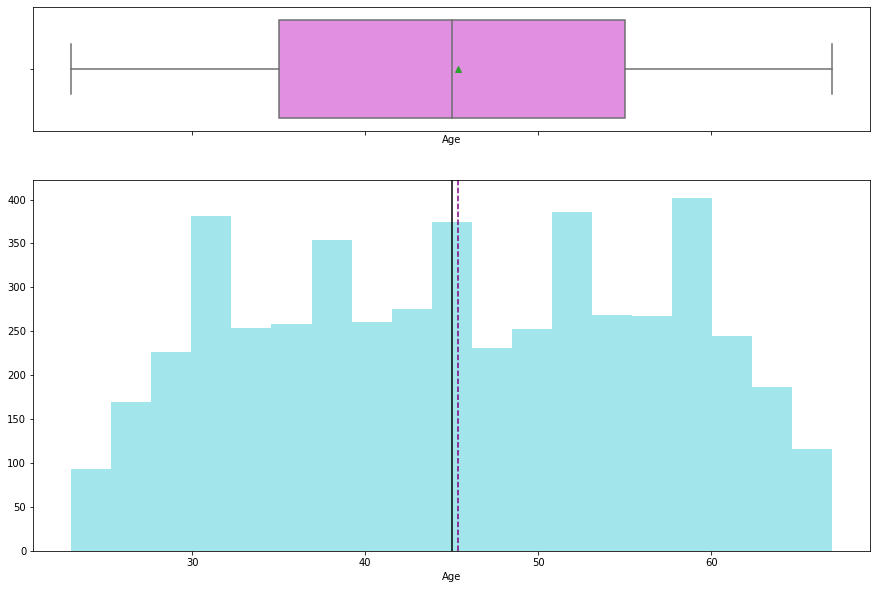

In [14]:
histogram_boxplot(data['Age'])

* The distribution of Age is fairly symmetrical about the mean and the median. 
* The mean and median age of customers is almost equal to ~45 years.

### Observations on Experience

* Treating the negative values of Experience: We assume that these negative signs here are data input errors, so we will replace them with positive signs

In [15]:
data[data['Experience']<0]['Experience'].unique()

array([-1, -2, -3], dtype=int64)

In [16]:
data['Experience'].replace(-1,1,inplace=True)
data['Experience'].replace(-2,2,inplace=True)
data['Experience'].replace(-3,3,inplace=True)

In [17]:
 data['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

* Minimum value of experience in 0 now.

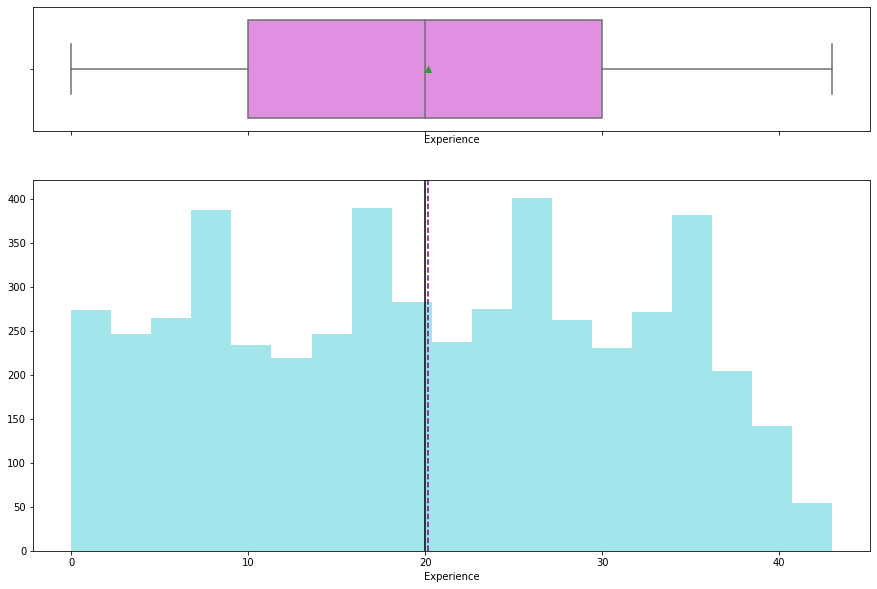

In [18]:
histogram_boxplot(data['Experience'])

* The Experience variable seems to be fairly symmetrical about mean and median.
* The distribution of Experience looks like the distribution of Age, it would be interesting to see if there's a correlation between them.
* The mean and median experience of customers is equal to ~20 years.
* Some customers have experience of more than 40 years.


### Observations on Income

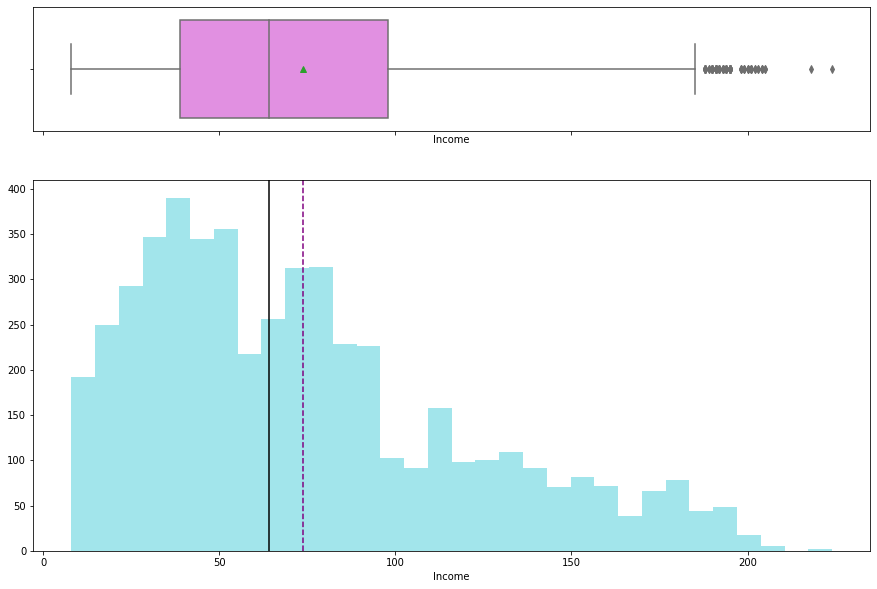

In [19]:
histogram_boxplot(data['Income'])

* The distribution of Income is skewed to right.
* Some customers have an Income above 200k dollars.
* 50% of the customers have income less than 64k dollars.

### Observations on CCAvg

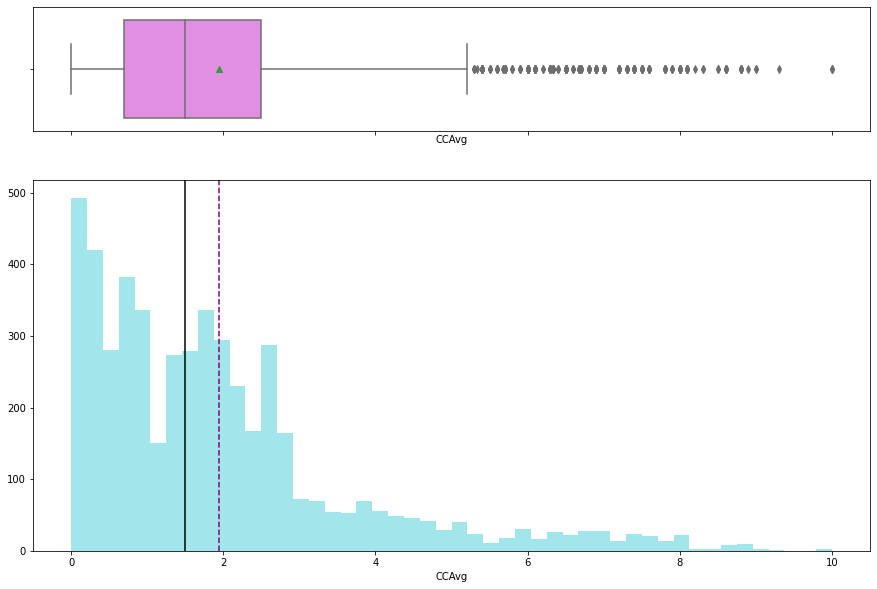

In [20]:
histogram_boxplot(data['CCAvg'])

* The distribution of CCAvg is skewed to the right and there are many outliers.
* 50% of the customers have CCAvg less than 1.5.
* We should check if the customers who spend more monthly are inclined toward taking a loan or not.

### Observations on Mortgage

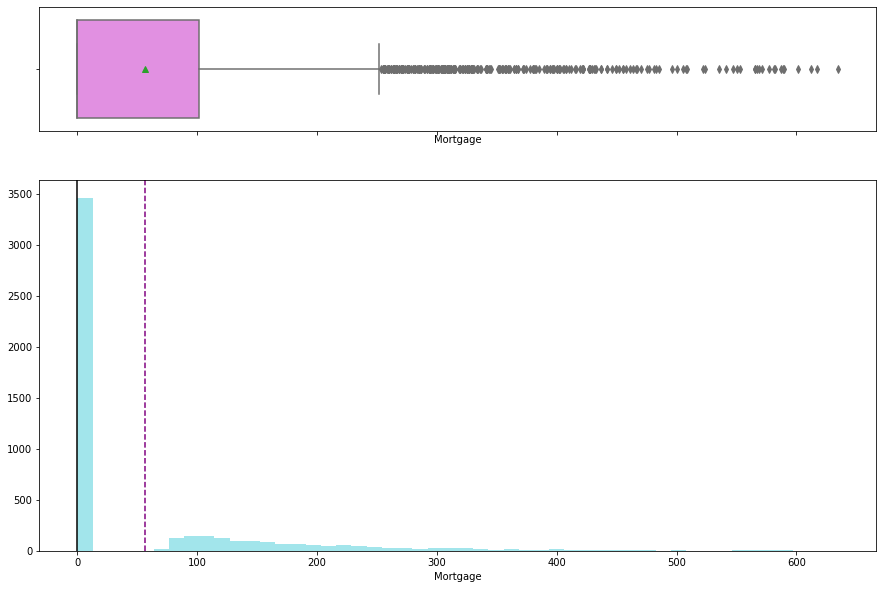

In [21]:
histogram_boxplot(data['Mortgage'])

* Most customers have not mortgaged their house but there are many outliers.
* Some customers have a mortgage house value of more than 600k dollars.
* Such customers can be potential customers who require a personal loan.

In [22]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on Family

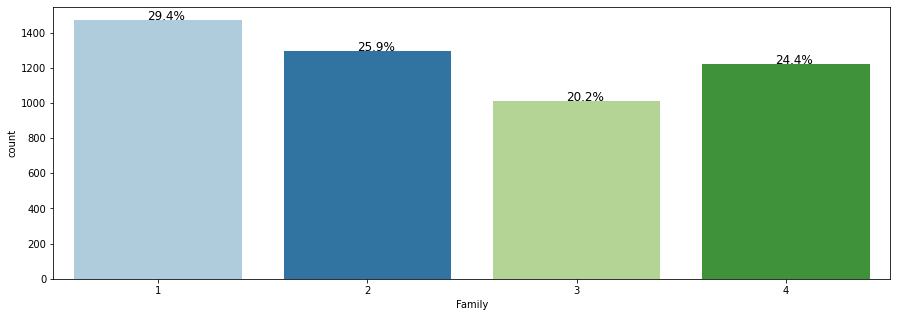

In [23]:
perc_on_bar('Family')

* Most of the customers are single/live alone (~30%).
* Second most are the ones with one dependent on them (25.9%).

### Observations on Education

In [24]:
# Let's map the values to 1: Undergrad; 2: Graduate 3: Advanced/Professional

In [25]:
data['Education'].replace(1,'Undergraduate',inplace=True)
data['Education'].replace(2,'Graduate',inplace=True)
data['Education'].replace(3,'Professional',inplace=True)

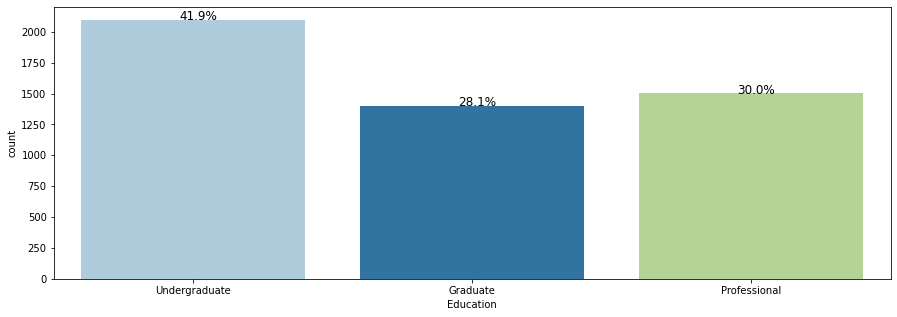

In [26]:
perc_on_bar('Education')

* Most of the customers are undergraduate (41.9%), followed by customers who have advanced/professional education (30%).

### Observations on Securities_Account

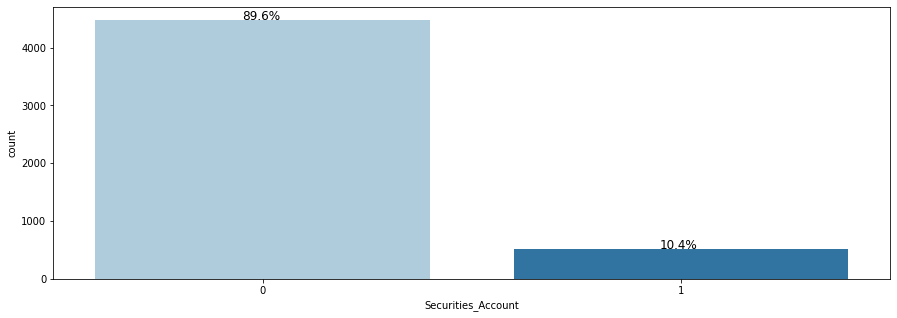

In [27]:
perc_on_bar('Securities_Account')

* 89% of the customers do not have a securities account.

### Observations on CD_Account

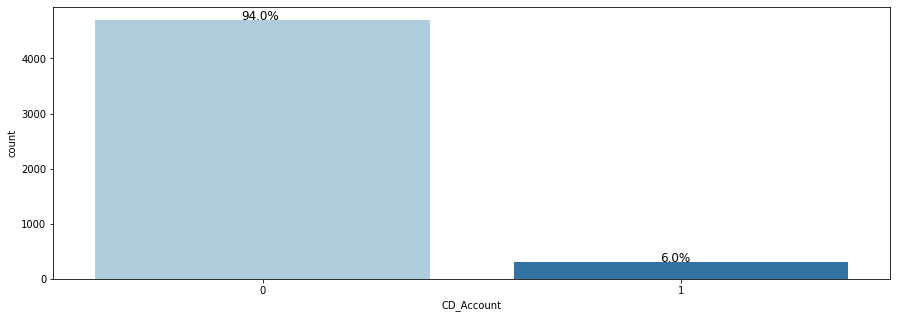

In [28]:
perc_on_bar('CD_Account')

* 94% of the customers do not have a certificate of deposit (CD_Account) with the bank.

### Observations on Online

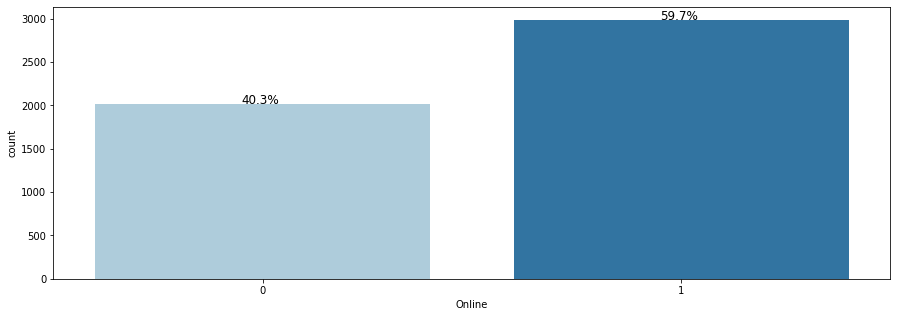

In [29]:
perc_on_bar('Online')

* Approximately 60% of the customers use internet banking facilities.

### Observation on CreditCard

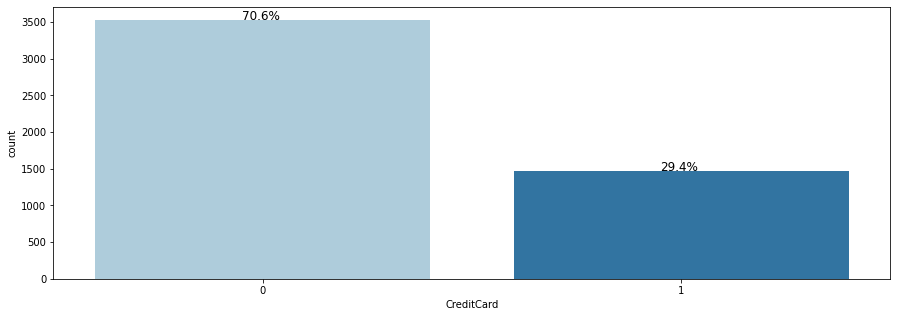

In [30]:
perc_on_bar('CreditCard')

* Approximately 70% of customers do not have a credit card issued by any other bank.

### Observation on ZIPCode

In [31]:
# checking the number of uniques in the zip code
data['ZIPCode'].nunique()

467

* There are 467 unique values in the zip code.
* In the US, The first digit of a PIN indicates the zone or a region, the second indicates the sub-zone, and the third, combined with the first two, indicates the sorting district within that zone. The final three digits are assigned to individual post offices within the sorting district
* Let's try to group them based on the first 2 digits to reduce the number of unique values in the ZIPCode column.

In [32]:
data['ZIPCode'] = data['ZIPCode'].astype(str)
print("Number of unique values if we take first two digits of ZIPCode: ",data['ZIPCode'].str[0:2].nunique())
data['ZIPCode'] = data['ZIPCode'].str[0:2]

Number of unique values if we take first two digits of ZIPCode:  7


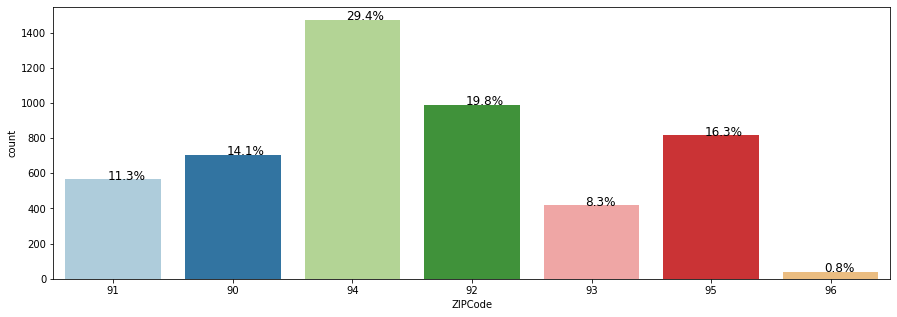

In [33]:
perc_on_bar('ZIPCode')

* All the customers are from region 9 and most from sub-region 4 followed by sub-region 2.
* This indicates that is located in region 9 and has customers from nearby areas.

## Bivariate Analysis

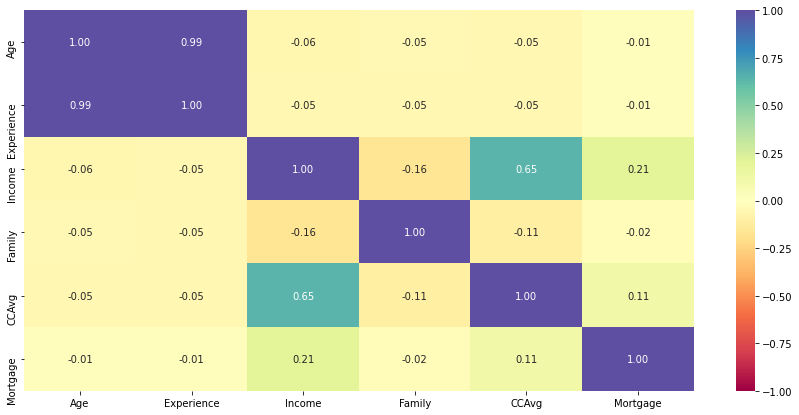

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* Age and Experience have a perfect correlation hence one of these variables can be dropped while model building as they will provide the same information to the model.

* Income and CCAvg have a moderate correlation which makes sense as the Income increases the spendings might also increase.

* Family has a negative correlation with Income, which is quite surprising as family size increases the income of the family decreases. But this correlation is not too strong to conclude.

In [35]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Personal_Loan'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Personal_Loan'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()


### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


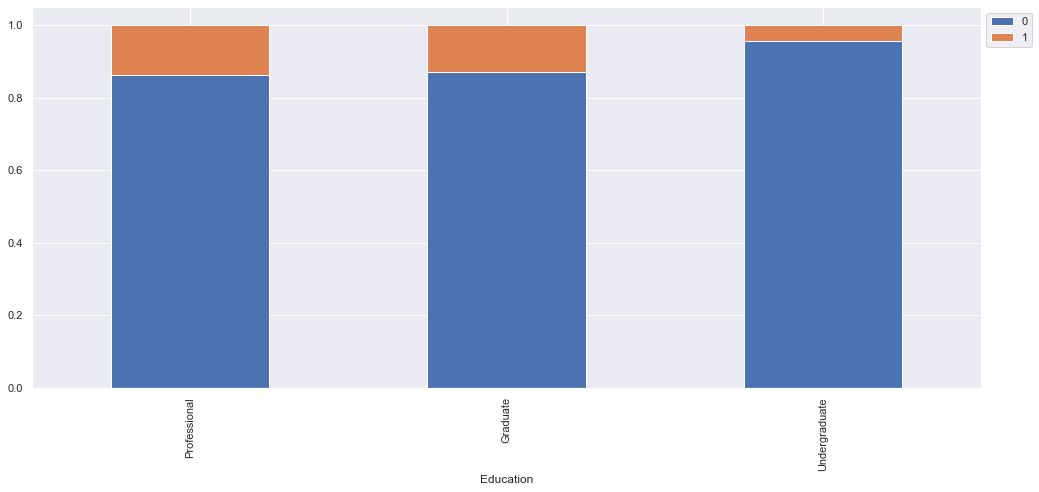

In [36]:
stacked_plot(data['Education'])

* ~15% of the customers who have done advanced/professional studies are the ones that require a personal loan.
* Undergraduates have the least requirement of personal loans.

### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


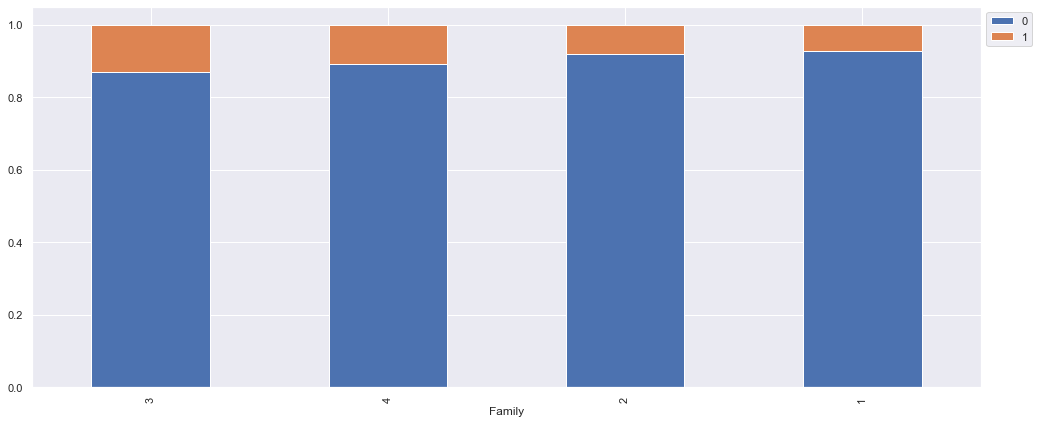

In [37]:
stacked_plot(data['Family'])

* As the family size increases the requirement of a Personal Loan also increases.
* Customers who have a family size of more than 2 are more likely to take a Personal Loan.

### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


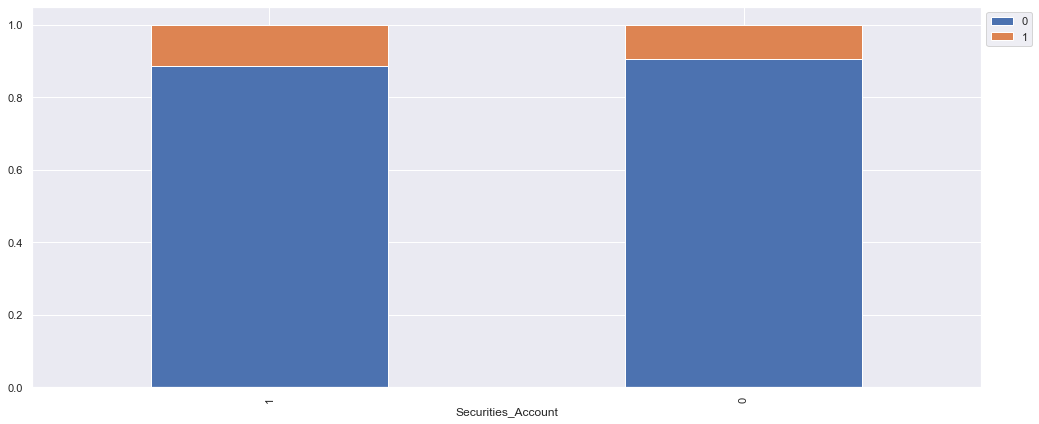

In [38]:
stacked_plot(data['Securities_Account'])

* There's not much difference between the customers who do or do not have a Security Account and require a Personal Loan.

### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


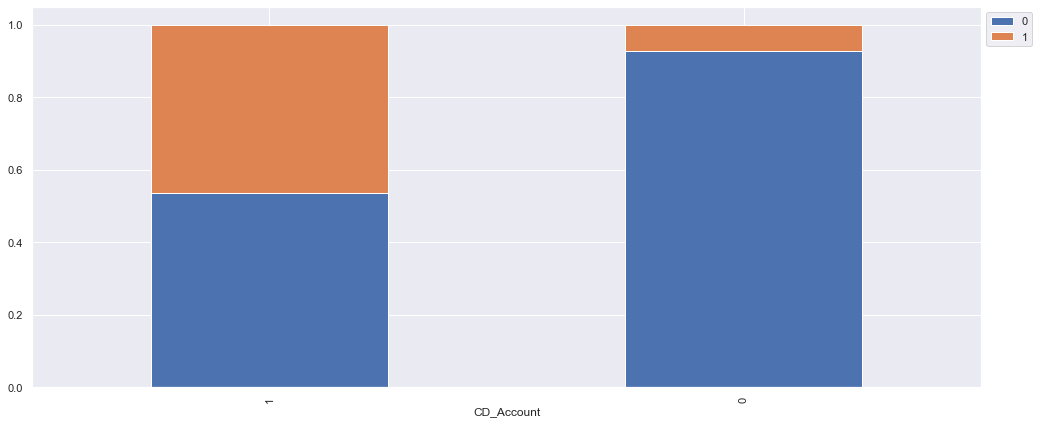

In [39]:
stacked_plot(data['CD_Account'])

* ~50% of the customers who have a certificate of deposit with the bank (CD_Account) are the ones that have the requirement of a Personal Loan.
* This can be one of the significant predictors of Personal Loan as it provides good separation between two classes.

### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


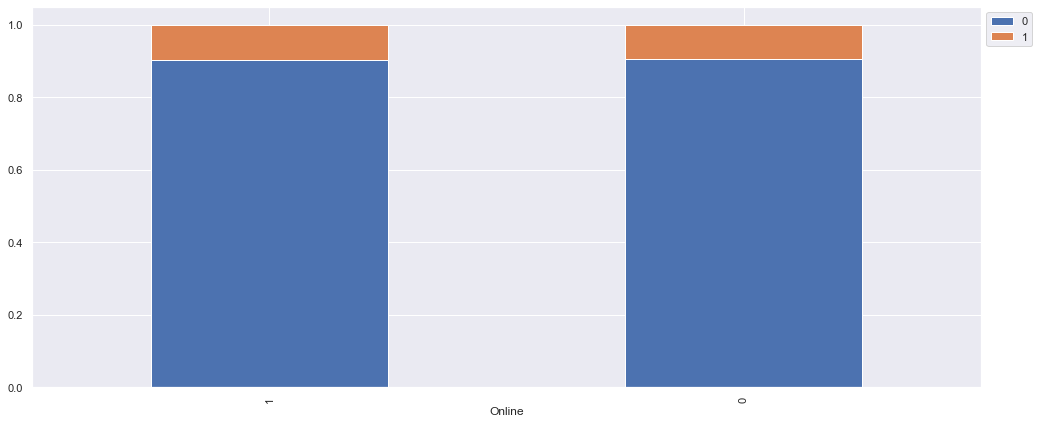

In [40]:
stacked_plot(data['Online'])

* There's not much difference between the customers who do or do use internet banking facilities and require a Personal Loan.

### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


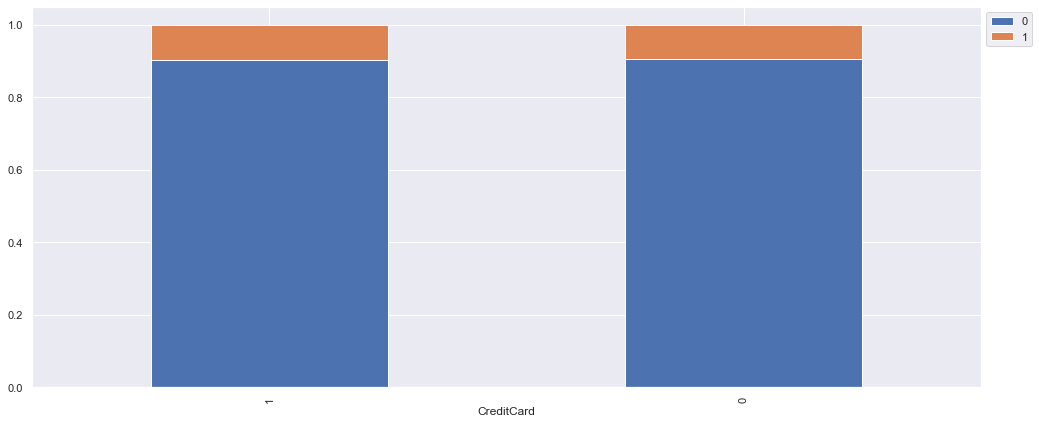

In [41]:
stacked_plot(data['CreditCard'])

* There's not much difference between the customers who do or do use a credit card from other banks and require a Personal Loan.

### Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


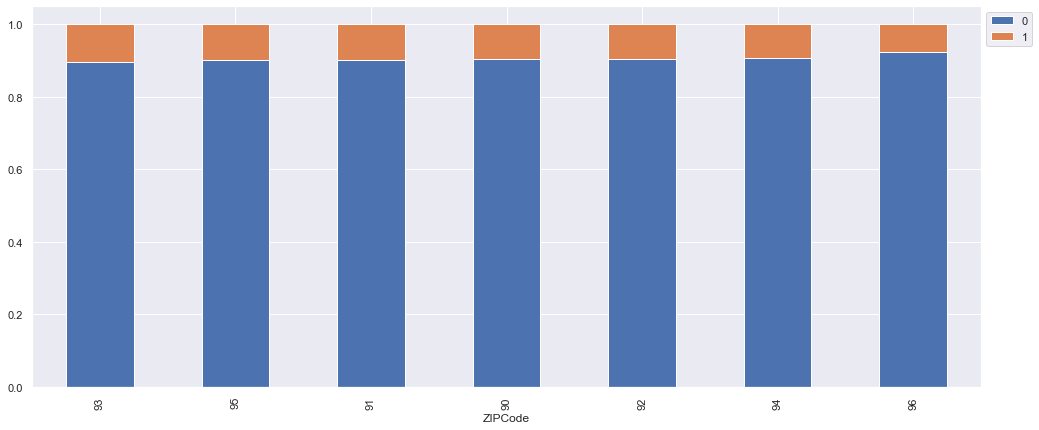

In [42]:
stacked_plot(data['ZIPCode'])

* All the sub-regions show fairly the same distribution/ requirement of a Personal Loan.

In [43]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Personal_Loan'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} of a customer who requires a Personal Loan',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x} of a customer who requires a Personal Loan",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Personal Loan',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Personal Loan - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

### Personal Loan vs Age

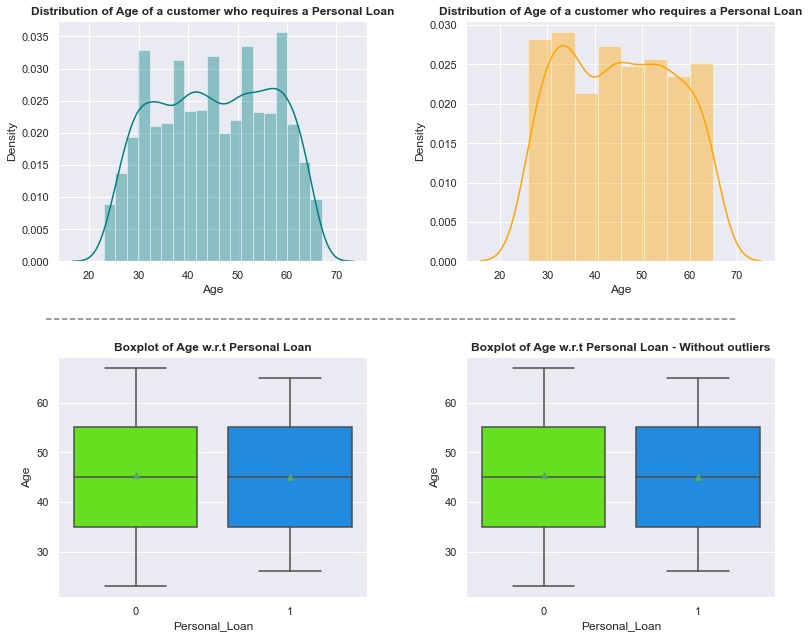

In [44]:
plot('Age')

* The customers who have the requirement of a Personal Loan have a wider range than the ones who do not require a Personal Loan.

### Personal Loan vs Experience

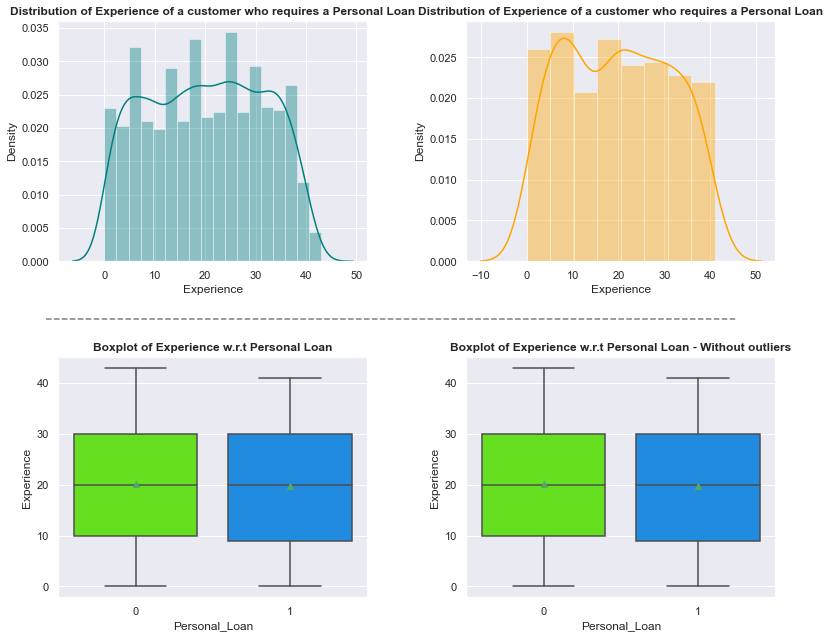

In [45]:
plot('Experience')

* There's no difference in the years of experience of customers who took Personal Loan and those who did not.

### Personal Loan vs Income

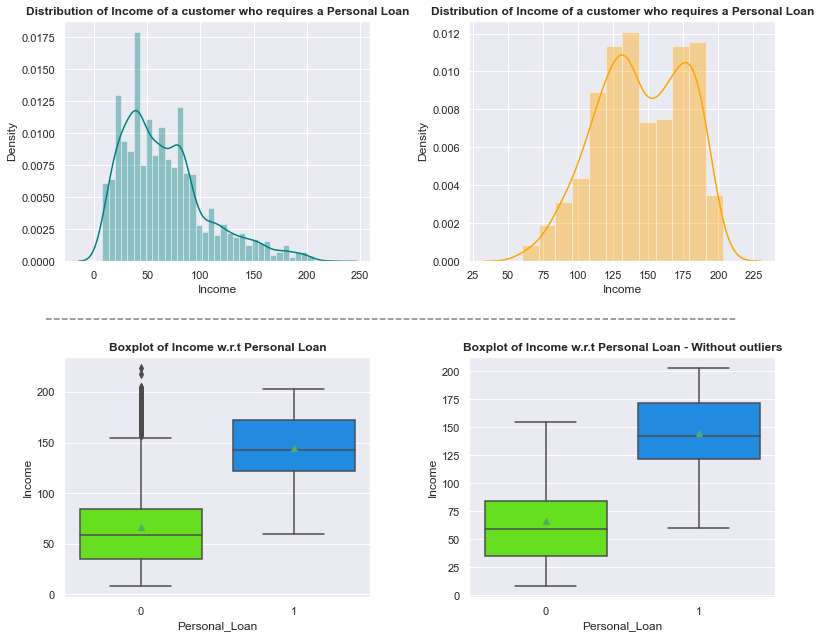

In [46]:
plot('Income')

* Those customers who have an income higher than 90k-100k dollars are the potential customers who will take the Personal Loan.
* Income seems to be a significant predictor as it provides a good separation between two classes.

### Personal Loan vs CCAvg

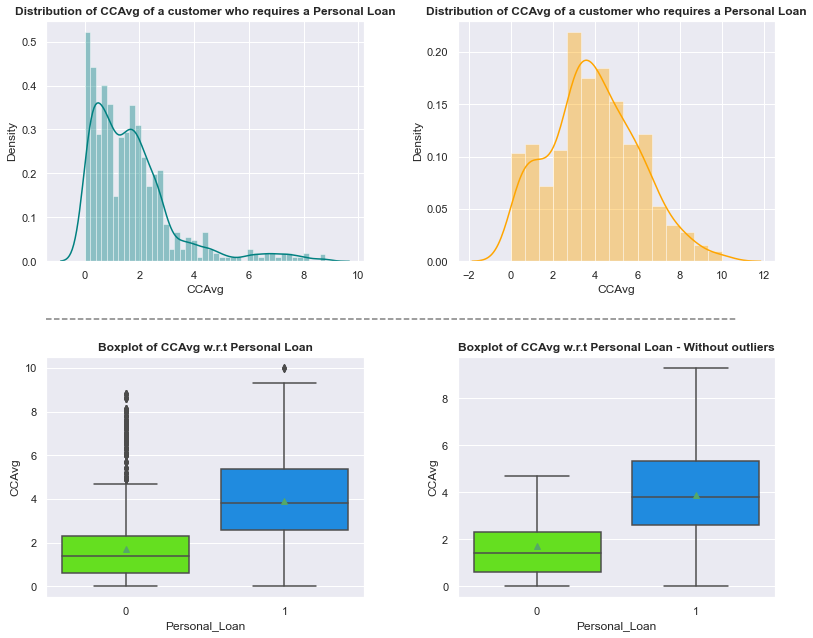

In [47]:
plot('CCAvg')

* The customers with a CCAvg of greater than 5 can be the potential customers who opt for Personal Loan.

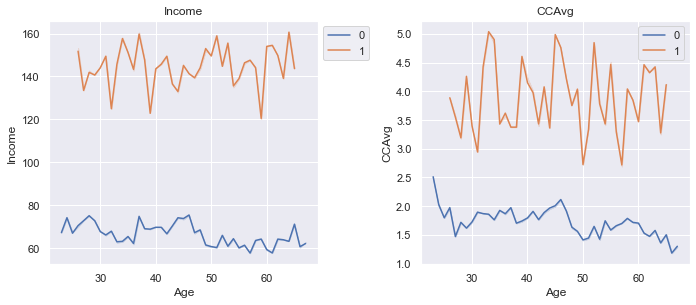

In [48]:
cols = data[['Income','CCAvg']].columns.tolist()
plt.figure(figsize=(15,12))
for i, variable in enumerate(cols):
                     plt.subplot(3,3,i+1)
                     sns.lineplot(data['Age'],data[variable],hue=data['Personal_Loan'],ci=0)
                     plt.tight_layout()
                     plt.title(variable)
                     plt.legend(bbox_to_anchor=(1, 1))
plt.show()

* Customers who require Personal Loans are the ones whose income fluctuates largely with the increase in Age and - This clearly shows how financial stability plays a big part in the requirement of a loan.
Customers whose income fluctuates largely with the age i.e. have less income stability are more likely to take a personal loan.

* We can observe a similar pattern like income w.r.t Avg.

### Let's find the percentage of outliers, in each column of the data, using IQR.

In [49]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [50]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in a real case scenario (in Income, Mortgage value, Average spending on the credit card, etc) and we would want our model to learn the underlying pattern for such customers.

### Data Preparation

* We have 6 categorical independent variables but 4 of them are binary, so we'll have the same results with them even after creating dummies
* So we will only make dummies for ZIPCode and Education.

In [51]:
data["ZIPCode"] = data["ZIPCode"].astype('category')

#### Creating a function to split, encode and add a constant to X
* The function will save us some time while checking high VIF values as we have to iteratively drop variables and check model performance.

In [52]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,Undergraduate,0,0,1,0,0,0
1,45,19,34,90,3,1.5,Undergraduate,0,0,1,0,0,0
2,39,15,11,94,1,1.0,Undergraduate,0,0,0,0,0,0
3,35,9,100,94,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91,4,1.0,Graduate,0,0,0,0,0,1


In [53]:
def split(*kwargs,columns=['ZIPCode','Education']):
    '''
    Function to split data into X and Y then one hot encode the X variable.
    Returns training and test sets
    *kwargs : Variable to remove from the dataset before splitting into X and Y
    '''
    X = data.drop([*kwargs], axis=1)
    Y = data['Personal_Loan']

    X = pd.get_dummies(X,columns=columns,drop_first=True)
    X = add_constant(X)

    #Splitting data in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
    return X_train,X_test, y_train, y_test

In [54]:
X_train,X_test, y_train, y_test = split('Personal_Loan')

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will take the personal loan and the customer doesn't take the loan - Loss of opportunity
2. Predicting a customer will not take the personal loan and the customer takes the loan - Loss of resources

### Which case is more important? 
* Predicting a customer will not take the personal loan and the customer takes the loan

### How to reduce this loss i.e need to reduce False Negatives?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_metrics_score function will be used to check the model performance of models.

In [55]:
def get_metrics_score(model,library,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library 
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    if library=='stats':
        score_list=[] 
    
        pred_train = (model.predict(train)>threshold)
        pred_test = (model.predict(test)>threshold)

        pred_train = np.round(pred_train)
        pred_test = np.round(pred_test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)
    
        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)
    
        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)
    
        train_f1 = f1_score(train_y,pred_train)
        test_f1 = f1_score(test_y,pred_test)
        
        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    elif library=='sklearn':
        score_list=[] 
    
        pred_train = model.predict(train)
        pred_test = model.predict(test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)

        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)

        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)

        train_f1 = f1_score(train_y,pred_train)
        test_f1 = f1_score(test_y,pred_test)


        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True and library=='sklearn':
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob  = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train_prob))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test_prob))
        
    elif roc == True and library=='stats':
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [56]:
def make_confusion_matrix(model,library,test_X,y_actual,threshold=0.5,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library 
    test_X: test set
    y_actual : ground truth  
    threshold: thresold for classifiying the observation as 1
    
    '''
    
    if library == 'sklearn':
        y_predict = model.predict(test_X)
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    
        df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
        group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize = (10,7))
        sns.heatmap(df_cm, annot=labels,fmt='')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    elif library =='stats':
        y_predict = model.predict(test_X)>threshold
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    
        df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
        group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize = (10,7))
        sns.heatmap(df_cm, annot=labels,fmt='')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

### Logistic Regression (with Sklearn library)

Accuracy on training set :  0.9562857142857143
Accuracy on test set :  0.9546666666666667
Recall on training set :  0.6374622356495468
Recall on test set :  0.6174496644295302
Precision on training set :  0.8647540983606558
Precision on test set :  0.8932038834951457
F1 on training set :  0.7339130434782609
F1 on test set :  0.7301587301587301


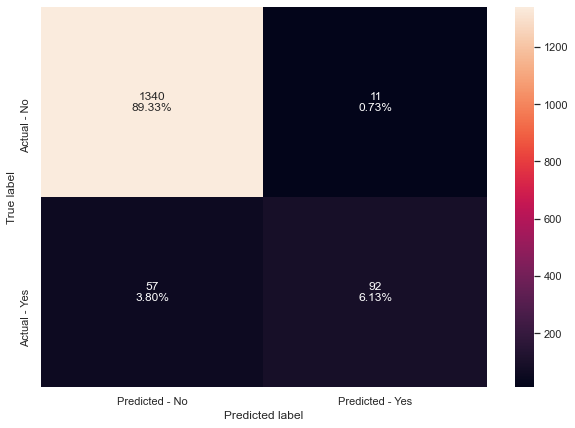

In [57]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train,y_train)

# confusion matrix

make_confusion_matrix(lr,'sklearn',X_test,y_test)

# Let's check model performances for this model
scores_LR = get_metrics_score(model,'sklearn',X_train,X_test,y_train,y_test)

- We have built a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the Statsmodels library.

- We will now perform logistic regression using Statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using Statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

### Logistic Regression (with statsmodels library)

In [58]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score(lg,'stats',X_train,X_test,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.113660
         Iterations 10
Accuracy on training set :  0.9594285714285714
Accuracy on test set :  0.9586666666666667
Recall on training set :  0.6676737160120846
Recall on test set :  0.6644295302013423
Precision on training set :  0.8735177865612648
Precision on test set :  0.8918918918918919
F1 on training set :  0.7568493150684931
F1 on test set :  0.7615384615384615


In [59]:
lg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Pseudo R-squared:   0.637      
Dependent Variable:   Personal_Loan      AIC:                833.6168   
Date:                 2021-06-04 19:02   BIC:                950.6666   
No. Observations:     3500               Log-Likelihood:     -397.81    
Df Model:             18                 LL-Null:            -1095.5    
Df Residuals:         3481               LLR p-value:        1.4524e-285
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       10.0000                                           
------------------------------------------------------------------------
                        Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------------
const                  -13.5644   2.1186 -6.4024 0.0000 -17.7168 -9.4119
Age                      0.0081   0.0774  0.1047 0.9166  -0.1436  0.1598
Experience              -0.0031   0.0774 -0.0399 0.9681  -0.1547  0.1486
Income                   0.0592   0.0036 16.4340 0.0000   0.0522  0.0663
Family                   0.6447   0.0960  6.7144 0.0000   0.4565  0.8329
CCAvg                    0.2087   0.0540  3.8677 0.0001   0.1030  0.3145
Mortgage                 0.0010   0.0007  1.3601 0.1738  -0.0004  0.0024
Securities_Account      -1.1709   0.4031 -2.9046 0.0037  -1.9610 -0.3808
CD_Account               3.8744   0.4298  9.0134 0.0000   3.0319  4.7168
Online                  -0.6532   0.2008 -3.2536 0.0011  -1.0467 -0.2597
CreditCard              -1.0829   0.2606 -4.1557 0.0000  -1.5936 -0.5722
ZIPCode_91              -0.1774   0.3689 -0.4809 0.6306  -0.9005  0.5457
ZIPCode_92               0.2593   0.3332  0.7782 0.4364  -0.3938  0.9125
ZIPCode_93               0.2110   0.4113  0.5131 0.6079  -0.5951  1.0171
ZIPCode_94              -0.0202   0.3114 -0.0649 0.9483  -0.6305  0.5901
ZIPCode_95              -0.0641   0.3503 -0.1830 0.8548  -0.7506  0.6224
ZIPCode_96              -3.4896   6.4728 -0.5391 0.5898 -16.1761  9.1968
Education_Graduate       3.9393   0.3297 11.9472 0.0000   3.2931  4.5856
Education_Professional   4.0388   0.3252 12.4205 0.0000   3.4015  4.6762
========================================================================

"""

**But first we will have to remove multicollinearity from the data to get reliable coefficients and p-values.** 
* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Multicollinearity

In [60]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train.astype(float).copy()

In [61]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                     453.895501
Age                        91.507013
Experience                 91.447602
Income                      1.887543
Family                      1.047121
CCAvg                       1.741885
Mortgage                    1.047707
Securities_Account          1.145044
CD_Account                  1.359831
Online                      1.042281
CreditCard                  1.110584
ZIPCode_91                  1.624930
ZIPCode_92                  1.928345
ZIPCode_93                  1.454123
ZIPCode_94                  2.225635
ZIPCode_95                  1.820139
ZIPCode_96                  1.044743
Education_Graduate          1.293748
Education_Professional      1.336549
dtype: float64



* Age and Experience are highly correlated, so we will drop one of them depending on which has less effect on making predictions.

**Dropping Age**

In [62]:
X_train1,X_test1,y_train,y_test = split('Personal_Loan','Age')

In [63]:
vif_series2 = pd.Series([variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])],index=X_train1.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                     24.019284
Experience                 1.012739
Income                     1.883042
Family                     1.046756
CCAvg                      1.737970
Mortgage                   1.047683
Securities_Account         1.144864
CD_Account                 1.359441
Online                     1.042176
CreditCard                 1.110531
ZIPCode_91                 1.624643
ZIPCode_92                 1.927137
ZIPCode_93                 1.454088
ZIPCode_94                 2.225627
ZIPCode_95                 1.820044
ZIPCode_96                 1.044418
Education_Graduate         1.280553
Education_Professional     1.259983
dtype: float64



In [64]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score(lg1,'stats',X_train1,X_test1,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.113661
         Iterations 10
Accuracy on training set :  0.9591428571428572
Accuracy on test set :  0.9573333333333334
Recall on training set :  0.6646525679758308
Recall on test set :  0.6577181208053692
Precision on training set :  0.873015873015873
Precision on test set :  0.8828828828828829
F1 on training set :  0.7547169811320755
F1 on test set :  0.7538461538461538


* No significant change in the model performance.

**Dropping Experience**

In [65]:
X_train2,X_test2,y_train,y_test = split('Personal_Loan','Experience')

In [66]:
vif_series3 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                     37.886588
Age                        1.013397
Income                     1.883708
Family                     1.046491
CCAvg                      1.737349
Mortgage                   1.047690
Securities_Account         1.144826
CD_Account                 1.359265
Online                     1.042185
CreditCard                 1.110517
ZIPCode_91                 1.624663
ZIPCode_92                 1.927383
ZIPCode_93                 1.454094
ZIPCode_94                 2.225572
ZIPCode_95                 1.819953
ZIPCode_96                 1.044512
Education_Graduate         1.279854
Education_Professional     1.260499
dtype: float64



In [67]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score(lg2,'stats',X_train2,X_test2,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.113660
         Iterations 10
Accuracy on training set :  0.9588571428571429
Accuracy on test set :  0.958
Recall on training set :  0.6646525679758308
Recall on test set :  0.6644295302013423
Precision on training set :  0.8695652173913043
Precision on test set :  0.8839285714285714
F1 on training set :  0.7534246575342465
F1 on test set :  0.7586206896551725


* No significant change in the model performance.

**Observations**
* The performance of lg1 and lg2 is the same so we can choose either of these models.
* Dropping Age or Experience removes the multicollinearity from the data.
* Let's proceed with `lg1` i.e. dropping Age variable and keeping the Experience variable

**Let's Look at summary of lg1 model.**

In [68]:
lg1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit              Pseudo R-squared:   0.637      
Dependent Variable:     Personal_Loan      AIC:                831.6277   
Date:                   2021-06-04 19:02   BIC:                942.5171   
No. Observations:       3500               Log-Likelihood:     -397.81    
Df Model:               17                 LL-Null:            -1095.5    
Df Residuals:           3482               LLR p-value:        1.5871e-286
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         10.0000                                           
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
const                  -13.3577   0.7629 -17.5089 0.0000 -14.8529 -11.8624
Experience               0.0050   0.0082   0.6051 0.5451  -0.0111   0.0210
Income                   0.0592   0.0036  16.4734 0.0000   0.0521   0.0662
Family                   0.6446   0.0960   6.7139 0.0000   0.4565   0.8328
CCAvg                    0.2088   0.0540   3.8681 0.0001   0.1030   0.3146
Mortgage                 0.0010   0.0007   1.3598 0.1739  -0.0004   0.0024
Securities_Account      -1.1718   0.4029  -2.9084 0.0036  -1.9615  -0.3821
CD_Account               3.8741   0.4298   9.0129 0.0000   3.0316   4.7166
Online                  -0.6538   0.2007  -3.2574 0.0011  -1.0472  -0.2604
CreditCard              -1.0838   0.2604  -4.1616 0.0000  -1.5943  -0.5734
ZIPCode_91              -0.1765   0.3689  -0.4785 0.6323  -0.8995   0.5464
ZIPCode_92               0.2604   0.3331   0.7816 0.4344  -0.3925   0.9133
ZIPCode_93               0.2130   0.4110   0.5182 0.6043  -0.5925   1.0185
ZIPCode_94              -0.0195   0.3113  -0.0625 0.9502  -0.6297   0.5907
ZIPCode_95              -0.0627   0.3500  -0.1791 0.8579  -0.7488   0.6234
ZIPCode_96              -3.4886   6.4764  -0.5387 0.5901 -16.1822   9.2050
Education_Graduate       3.9402   0.3296  11.9561 0.0000   3.2943   4.5861
Education_Professional   4.0429   0.3228  12.5244 0.0000   3.4102   4.6756
==========================================================================

"""

* Observe that the p-value of Experience, Mortgage, and all 6 classes of ZIP code is greater than 0.05, they are insignificant.
* Let's Drop them one by one and observe how our model changes.
* This is something we observed during EDA also, Experience and ZIPCode didn't show any specific pattern with the Personal Loan.

**Dropping Experience**

In [69]:
X_train3,X_test3,y_train,y_test = split('Personal_Loan','Age','Experience')
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(warn_convergence =False)
lg3.summary2()

Optimization terminated successfully.
         Current function value: 0.113713
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit              Pseudo R-squared:   0.637      
Dependent Variable:     Personal_Loan      AIC:                829.9941   
Date:                   2021-06-04 19:02   BIC:                934.7229   
No. Observations:       3500               Log-Likelihood:     -398.00    
Df Model:               16                 LL-Null:            -1095.5    
Df Residuals:           3483               LLR p-value:        2.0045e-287
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         10.0000                                           
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
const                  -13.2291   0.7298 -18.1263 0.0000 -14.6596 -11.7987
Income                   0.0592   0.0036  16.4762 0.0000   0.0521   0.0662
Family                   0.6432   0.0960   6.6995 0.0000   0.4550   0.8313
CCAvg                    0.2052   0.0537   3.8217 0.0001   0.1000   0.3105
Mortgage                 0.0009   0.0007   1.3210 0.1865  -0.0005   0.0024
Securities_Account      -1.1723   0.4035  -2.9056 0.0037  -1.9631  -0.3815
CD_Account               3.8866   0.4298   9.0428 0.0000   3.0442   4.7290
Online                  -0.6555   0.2006  -3.2668 0.0011  -1.0487  -0.2622
CreditCard              -1.0856   0.2604  -4.1686 0.0000  -1.5960  -0.5752
ZIPCode_91              -0.1865   0.3685  -0.5062 0.6127  -0.9087   0.5357
ZIPCode_92               0.2545   0.3332   0.7640 0.4449  -0.3985   0.9076
ZIPCode_93               0.2072   0.4108   0.5043 0.6140  -0.5980   1.0123
ZIPCode_94              -0.0329   0.3107  -0.1058 0.9158  -0.6418   0.5760
ZIPCode_95              -0.0670   0.3497  -0.1917 0.8480  -0.7524   0.6183
ZIPCode_96              -3.4545   6.3813  -0.5414 0.5883 -15.9616   9.0526
Education_Graduate       3.9357   0.3293  11.9499 0.0000   3.2902   4.5812
Education_Professional   4.0344   0.3222  12.5219 0.0000   3.4029   4.6659
==========================================================================

"""

**Dropping Mortgage**

In [70]:
X_train4,X_test4,y_train,y_test = split('Personal_Loan','Age','Experience','Mortgage')
logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit(warn_convergence =False)
lg4.summary2()

Optimization terminated successfully.
         Current function value: 0.113961
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit              Pseudo R-squared:   0.636      
Dependent Variable:     Personal_Loan      AIC:                829.7284   
Date:                   2021-06-04 19:02   BIC:                928.2967   
No. Observations:       3500               Log-Likelihood:     -398.86    
Df Model:               15                 LL-Null:            -1095.5    
Df Residuals:           3484               LLR p-value:        4.8230e-288
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         10.0000                                           
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
const                  -13.1972   0.7287 -18.1094 0.0000 -14.6256 -11.7689
Income                   0.0596   0.0036  16.6786 0.0000   0.0526   0.0667
Family                   0.6454   0.0959   6.7266 0.0000   0.4573   0.8334
CCAvg                    0.1985   0.0533   3.7233 0.0002   0.0940   0.3030
Securities_Account      -1.1570   0.4021  -2.8776 0.0040  -1.9450  -0.3690
CD_Account               3.8935   0.4295   9.0657 0.0000   3.0517   4.7352
Online                  -0.6588   0.2004  -3.2869 0.0010  -1.0516  -0.2660
CreditCard              -1.0887   0.2598  -4.1908 0.0000  -1.5979  -0.5795
ZIPCode_91              -0.1635   0.3667  -0.4460 0.6556  -0.8822   0.5552
ZIPCode_92               0.2666   0.3326   0.8014 0.4229  -0.3853   0.9185
ZIPCode_93               0.2445   0.4088   0.5982 0.5497  -0.5567   1.0458
ZIPCode_94              -0.0371   0.3107  -0.1194 0.9050  -0.6461   0.5719
ZIPCode_95              -0.0505   0.3486  -0.1449 0.8848  -0.7338   0.6328
ZIPCode_96              -3.2743   5.7634  -0.5681 0.5700 -14.5702   8.0217
Education_Graduate       3.9183   0.3285  11.9289 0.0000   3.2745   4.5620
Education_Professional   4.0154   0.3212  12.5002 0.0000   3.3858   4.6450
==========================================================================

"""

In [71]:
X_train5,X_test5,y_train,y_test = split('Personal_Loan','Age','Experience','Mortgage','ZIPCode',columns=['Education'])
logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit(warn_convergence =False)
lg5.summary2()

Optimization terminated successfully.
         Current function value: 0.114420
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit              Pseudo R-squared:   0.634      
Dependent Variable:     Personal_Loan      AIC:                820.9424   
Date:                   2021-06-04 19:02   BIC:                882.5476   
No. Observations:       3500               Log-Likelihood:     -400.47    
Df Model:               9                  LL-Null:            -1095.5    
Df Residuals:           3490               LLR p-value:        1.1308e-293
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         9.0000                                            
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
const                  -13.1295   0.6938 -18.9229 0.0000 -14.4894 -11.7696
Income                   0.0593   0.0035  16.7328 0.0000   0.0524   0.0663
Family                   0.6484   0.0958   6.7680 0.0000   0.4606   0.8362
CCAvg                    0.2002   0.0531   3.7677 0.0002   0.0961   0.3044
Securities_Account      -1.1467   0.3990  -2.8736 0.0041  -1.9288  -0.3646
CD_Account               3.8585   0.4250   9.0794 0.0000   3.0256   4.6914
Online                  -0.6639   0.1995  -3.3275 0.0009  -1.0550  -0.2729
CreditCard              -1.0719   0.2592  -4.1347 0.0000  -1.5800  -0.5638
Education_Graduate       3.8808   0.3254  11.9267 0.0000   3.2430   4.5185
Education_Professional   4.0089   0.3206  12.5058 0.0000   3.3806   4.6372
==========================================================================

"""

* All the variables left a significant (P-value<0.5).
* So we can say that lg5 is the best model for making any inference.

### Metrics of final logistic model (lg5)

Accuracy on training set :  0.9588571428571429
Accuracy on test set :  0.9586666666666667
Recall on training set :  0.676737160120846
Recall on test set :  0.6577181208053692
Precision on training set :  0.8582375478927203
Precision on test set :  0.8990825688073395
F1 on training set :  0.7567567567567568
F1 on test set :  0.7596899224806203


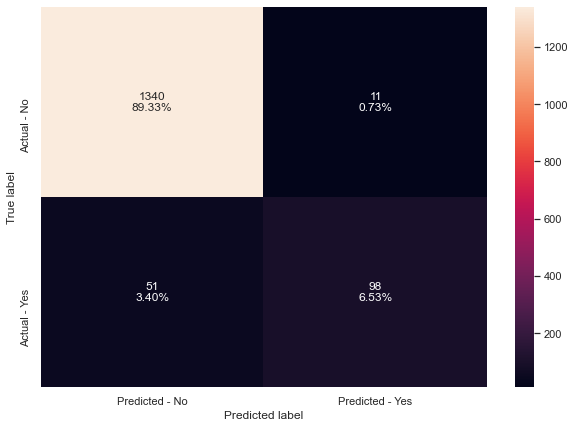

In [72]:
#confusion matrix
make_confusion_matrix(lg5,'stats',X_test5,y_test)

# metrics
scores_LR = get_metrics_score(lg5,'stats',X_train5,X_test5,y_train,y_test)

* ROC-AUC on training set

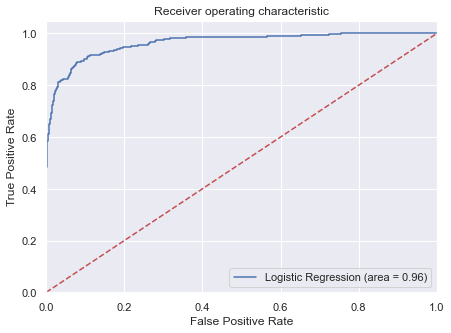

In [73]:
logit_roc_auc_train = roc_auc_score(y_train, lg5.predict(X_train5))
fpr, tpr, thresholds = roc_curve(y_train, lg5.predict(X_train5))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

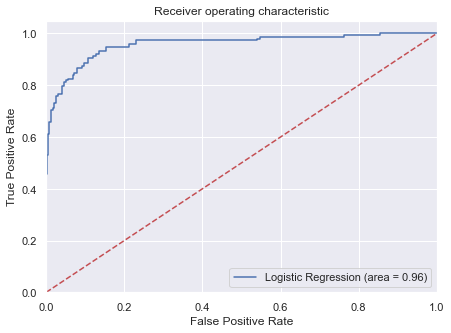

In [74]:
logit_roc_auc_test = roc_auc_score(y_test, lg5.predict(X_test5))
fpr, tpr, thresholds = roc_curve(y_test, lg5.predict(X_test5))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.
* ROC-AUC score of 0.96 on training and test set is quite good.

In [75]:
lg5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit              Pseudo R-squared:   0.634      
Dependent Variable:     Personal_Loan      AIC:                820.9424   
Date:                   2021-06-04 19:02   BIC:                882.5476   
No. Observations:       3500               Log-Likelihood:     -400.47    
Df Model:               9                  LL-Null:            -1095.5    
Df Residuals:           3490               LLR p-value:        1.1308e-293
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         9.0000                                            
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
const                  -13.1295   0.6938 -18.9229 0.0000 -14.4894 -11.7696
Income                   0.0593   0.0035  16.7328 0.0000   0.0524   0.0663
Family                   0.6484   0.0958   6.7680 0.0000   0.4606   0.8362
CCAvg                    0.2002   0.0531   3.7677 0.0002   0.0961   0.3044
Securities_Account      -1.1467   0.3990  -2.8736 0.0041  -1.9288  -0.3646
CD_Account               3.8585   0.4250   9.0794 0.0000   3.0256   4.6914
Online                  -0.6639   0.1995  -3.3275 0.0009  -1.0550  -0.2729
CreditCard              -1.0719   0.2592  -4.1347 0.0000  -1.5800  -0.5638
Education_Graduate       3.8808   0.3254  11.9267 0.0000   3.2430   4.5185
Education_Professional   4.0089   0.3206  12.5058 0.0000   3.3806   4.6372
==========================================================================

"""

### Coefficient interpretations

* Coefficients of Income, Family, CCAvg, CD_Account, and Education are positive an increase in these will lead to an increase in chances of taking a personal loan.
* Coefficients of Securities_Account, CreditCard, and Online are negative an increase in these will lead to a decrease in chances of taking a personal loan.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [76]:
odds = np.exp(lg5.params) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train5.columns, columns=['odds']).T # adding the odds to a dataframe

,const,Income,Family,CCAvg,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Professional
odds,0.000002,1.061114,1.912515,1.221683,0.31768,47.393495,0.514827,0.342353,48.460596,55.087516


**Percentage change in odds**

In [77]:
perc_change_odds = (np.exp(lg5.params)-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train5.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

,const,Income,Family,CCAvg,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Professional
change_odds%,-99.999801,6.111416,91.251488,22.16825,-68.232001,4639.349472,-48.517268,-65.764679,4746.05958,5408.751567


### Coefficient interpretations

* Income: Holding all other features constant a 1 unit change in Income will increase the odds of a customer taking a personal loan by 1.06 times or a 6.1% increase in the odds of a customer taking a personal loan.
* Family: Holding all other features constant a 1 unit change in Family will increase the odds of a customer taking a personal loan by 1.91 times or a 91.25% increase in the odds of a customer taking a personal loan.
* CCAvg: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a customer taking a personal loan by 1.22 times or a 22.16% increase in the odds of a customer taking a personal loan.
* Securities_Account: The odds of a customer who has a Securities Account taking a personal loan are 0.31 times less than a person who doesn't have a securities account or a 68.23% fewer odds of a customer taking a personal loan.
* Online: The odds of a customer who prefers internet banking facilities taking a personal loan is 0.51 times less than a customer who doesn't prefer internet banking facilities or a 48.5% fewer odds than the customer who doesn't use internet banking facilities
* Education and CD_Account have greater coefficients, so small changes in their value will have a bigger change in chances of taking a personal loan.


`Interpretation for other attributes can be done similarly.`

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [78]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg5.predict(X_test5))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.07305286213110446


Accuracy on training set :  0.8857142857142857
Accuracy on test set :  0.8926666666666667
Recall on training set :  0.9154078549848943
Recall on test set :  0.8993288590604027
Precision on training set :  0.4488888888888889
Precision on test set :  0.4785714285714286
F1 on training set :  0.6023856858846919
F1 on test set :  0.6247086247086246
ROC-AUC Score on training set :  0.8990103332986952
ROC-AUC Score on test set :  0.8956303806774997


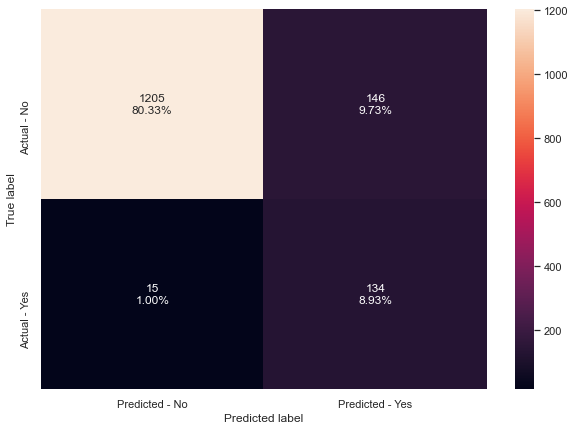

In [79]:
#confusion matrix
make_confusion_matrix(lg5,'stats',X_test5,y_test,threshold=optimal_threshold_auc_roc)

# checking model performance
scores_LR = get_metrics_score(lg5,'stats',X_train5,X_test5,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

* Recall increased from on the test set as compared to the previous model.
* As we will decrease the threshold value, Recall will keep on increasing but the Precision will decrease, but that's not right because it will lead to loss of resources, we need to choose an optimal balance between recall and precision.
* Area under the curve is has decreased as compared to the initial model.

#### Let's use Precision-Recall curve and see if we can find a better threshold

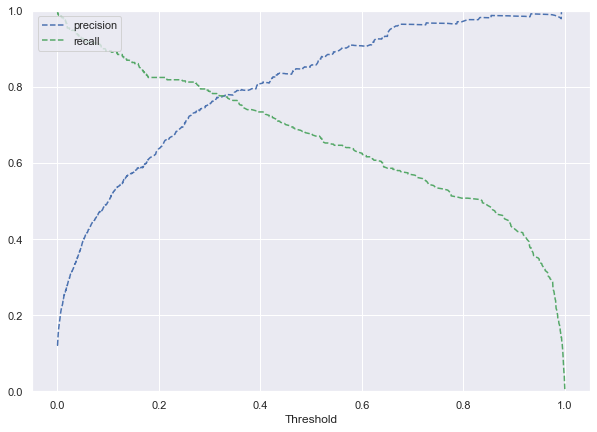

In [80]:
y_scores=lg5.predict(X_train5)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.25 threshold we get a higher recall and a good precision.

Accuracy on training set :  0.9497142857142857
Accuracy on test set :  0.95
Recall on training set :  0.8157099697885196
Recall on test set :  0.7583892617449665
Precision on training set :  0.7012987012987013
Precision on test set :  0.743421052631579
F1 on training set :  0.7541899441340781
F1 on test set :  0.7508305647840532
ROC-AUC Score on training set :  0.8897104598074818
ROC-AUC Score on test set :  0.8647608780967615


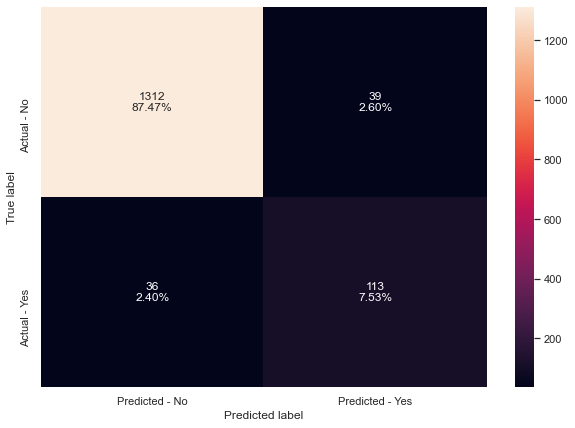

In [81]:
optimal_threshold_curve = 0.25

#confusion matrix
make_confusion_matrix(lg5,'stats',X_test5,y_test,threshold=optimal_threshold_curve)

# checking model performance
scores_LR = get_metrics_score(lg5,'stats',X_train5,X_test5,y_train,y_test,threshold=optimal_threshold_curve,roc=True)

* Model is performing well on training and test set.
* Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used.
* Area under the curve has decreased as compared to the initial model but the performance is generalized on training and test set.

# Decision Trees

## Split data

In [82]:
X_train, X_test, y_train, y_test = split('Personal_Loan')

In [83]:
# we do not need constant in Decision Tree model
X_train = X_train.drop(['const'],axis=1)
X_test = X_test.drop(['const'],axis=1)


## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other options include 'entropy'.  

In [84]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

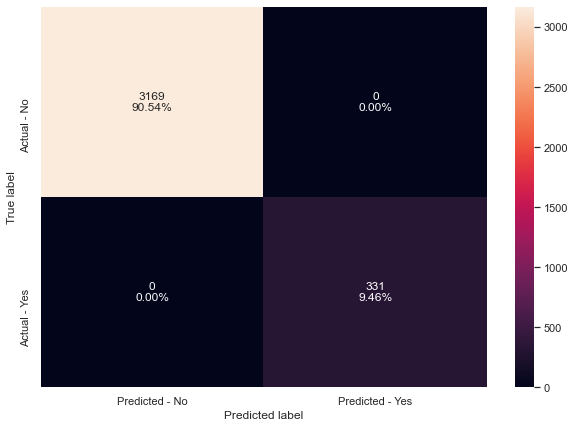

In [85]:
# let us make confusion matrix on train set
make_confusion_matrix(dTree,'sklearn',X_train,y_train)

* 0 errors on train data, each sample has been classified correctly.

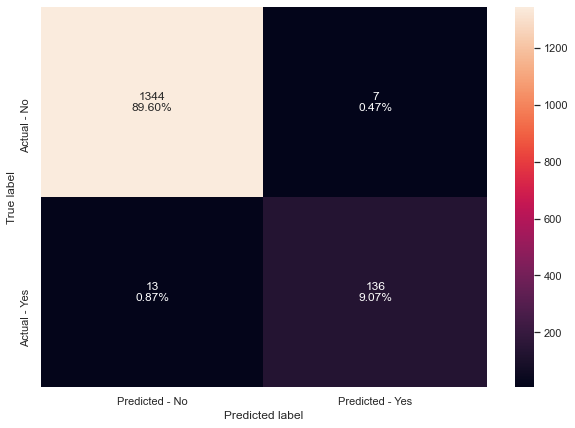

In [86]:
# let us make confusion matrix on train set
make_confusion_matrix(dTree,'sklearn',X_test,y_test)

In [87]:
# Let's check model performances for this model
scores_LR = get_metrics_score(dTree,'sklearn',X_train,X_test,y_train,y_test,roc=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9866666666666667
Recall on training set :  1.0
Recall on test set :  0.912751677852349
Precision on training set :  1.0
Precision on test set :  0.951048951048951
F1 on training set :  1.0
F1 on test set :  0.9315068493150686
ROC-AUC Score on training set :  1.0
ROC-AUC Score on test set :  0.953785165351045


* Model has performed very well on training and test set.
* There's slight overfitting in terms of recall, let's see if pruning methods can help in improving the metrics. 
* Area under the curve on the test set is 0.95 which is quite good.


## Visualizing the Decision Tree

In [88]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Graduate', 'Education_Professional']


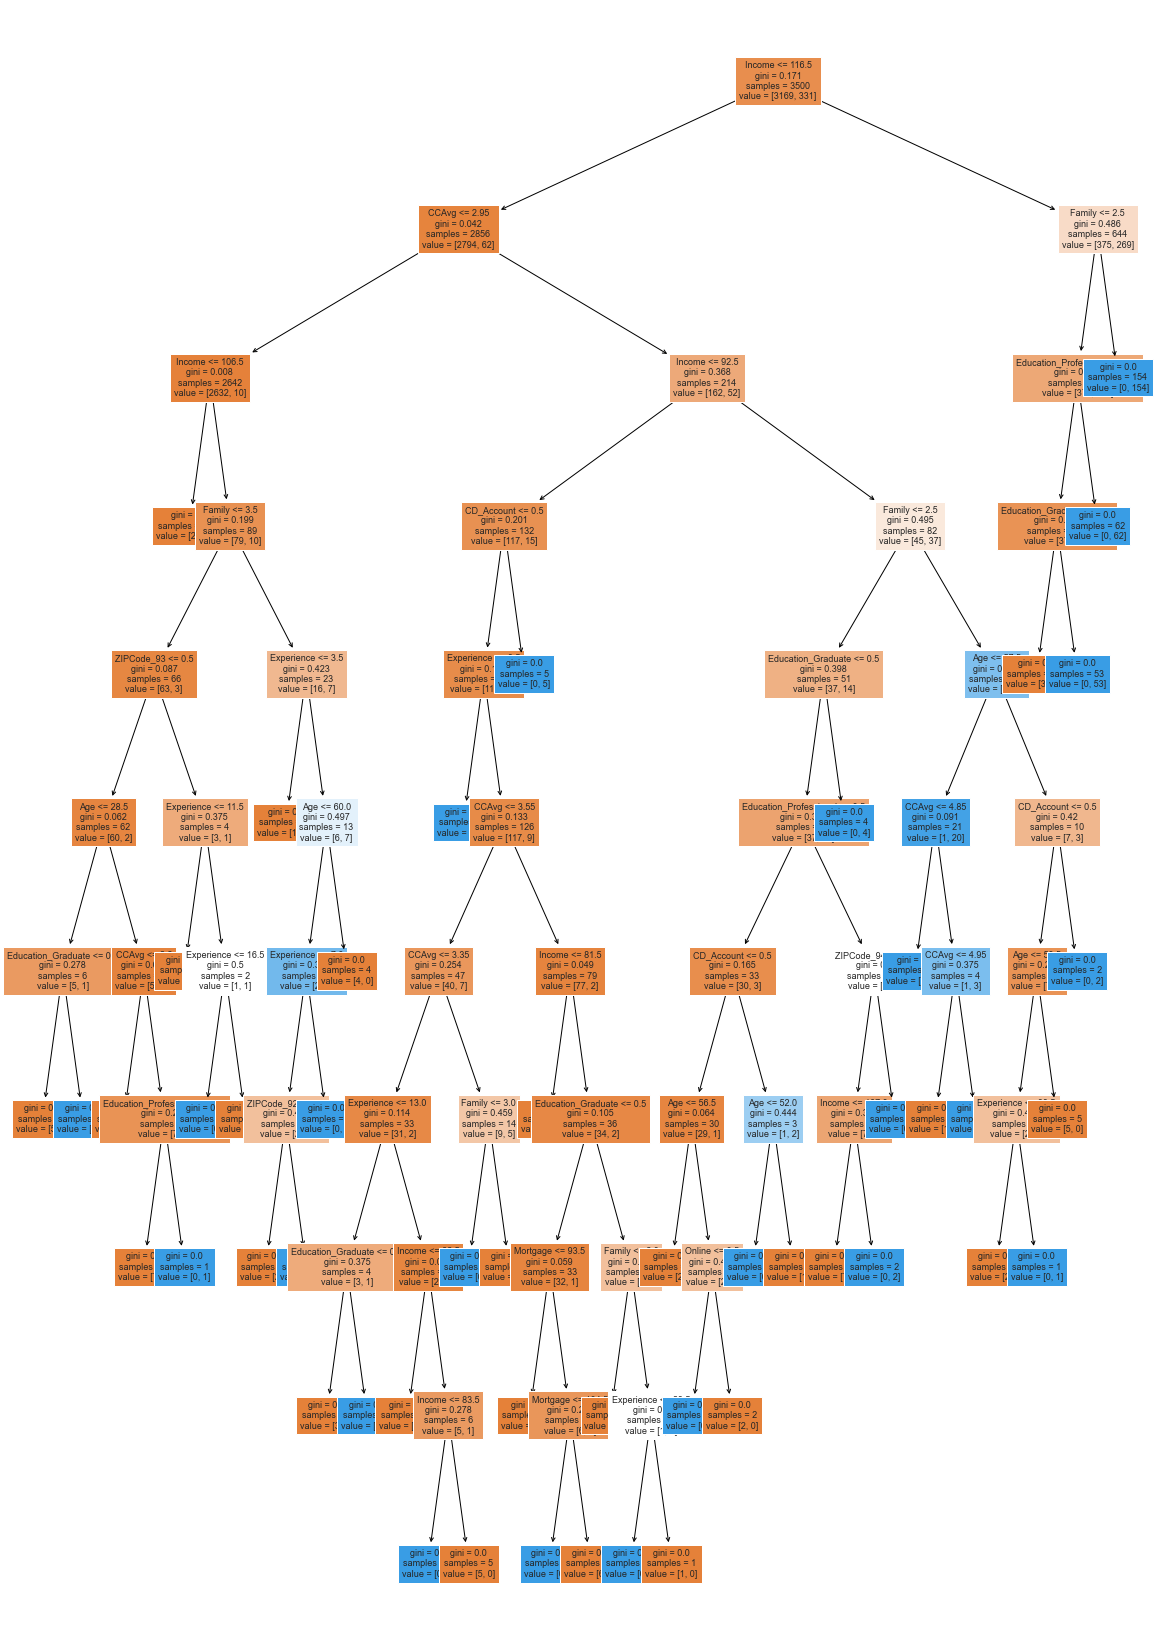

In [89]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [90]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|

In [91]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Income                  0.306430
Family                  0.258143
Education_Graduate      0.168695
Education_Professional  0.147127
CCAvg                   0.045718
CD_Account              0.021361
Age                     0.019531
Experience              0.018229
ZIPCode_94              0.006488
Mortgage                0.003236
Online                  0.002224
ZIPCode_92              0.002224
ZIPCode_93              0.000594
Securities_Account      0.000000
ZIPCode_91              0.000000
ZIPCode_95              0.000000
ZIPCode_96              0.000000
CreditCard              0.000000


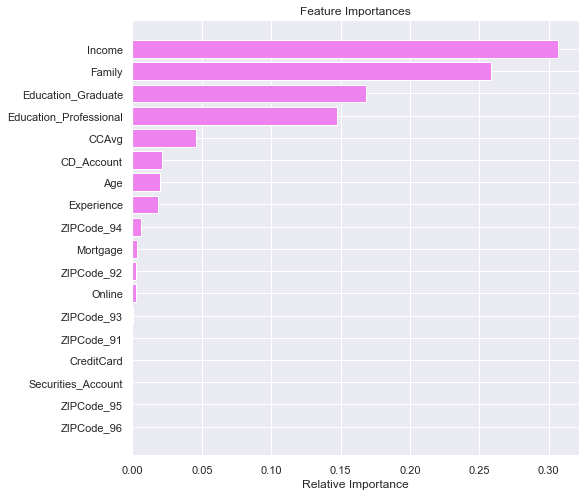

In [92]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations

* Online, CreditCard, Securities_Account, ZIPCode have very little importance, Income is most important followed by Family and Education
* People with Income less than 116.5k dollars, CCAvg less than 2.95, and Income less than 106.5k dollars have fewer chances of taking a Personal Loan.
* But people having income more than 106.5, Family not of size 4, age less than 28.50 and Experience greater than 3.50 have more chances of taking a loan.
* People with Income greater than 116.5, are undergraduate, have a family size less than 2 have fewer chances of buying a loan while People with a family size greater than 2, and education level more than undergraduate has more chances of buying a loan.
* So bank should campaign more on people with higher income, More education, and larger family sizes

## Reducing overfitting (Regularization)

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting.

### Let's try Grid search
* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in then
hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Gridsearch
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [93]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(6,15), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

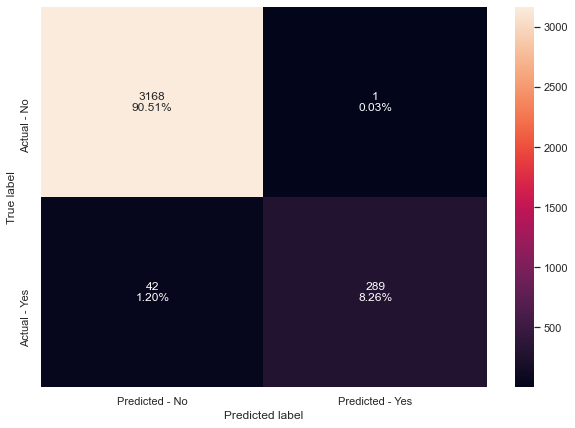

In [94]:
# let us make confusion matrix on train set
make_confusion_matrix(estimator,'sklearn',X_train,y_train)

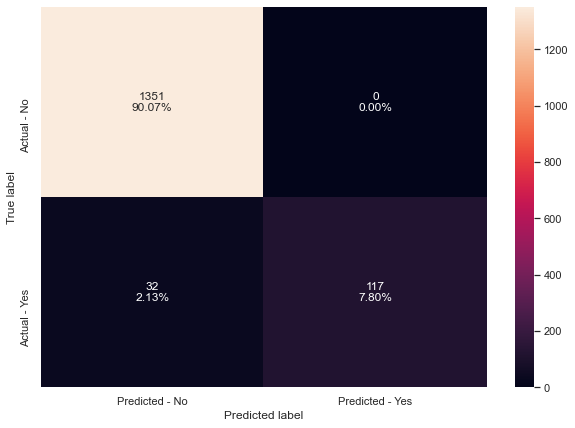

In [95]:
# let us make confusion matrix on train set
make_confusion_matrix(estimator,'sklearn',X_test,y_test)

In [96]:
# Let's check model performances for this model
scores_LR = get_metrics_score(estimator,'sklearn',X_train,X_test,y_train,y_test,roc=True)

Accuracy on training set :  0.9877142857142858
Accuracy on test set :  0.9786666666666667
Recall on training set :  0.8731117824773413
Recall on test set :  0.785234899328859
Precision on training set :  0.996551724137931
Precision on test set :  1.0
F1 on training set :  0.9307568438003219
F1 on test set :  0.8796992481203008
ROC-AUC Score on training set :  0.9962228499464698
ROC-AUC Score on test set :  0.9921410439197413


* The model is performing good but overfitting has increased in terms of recall.

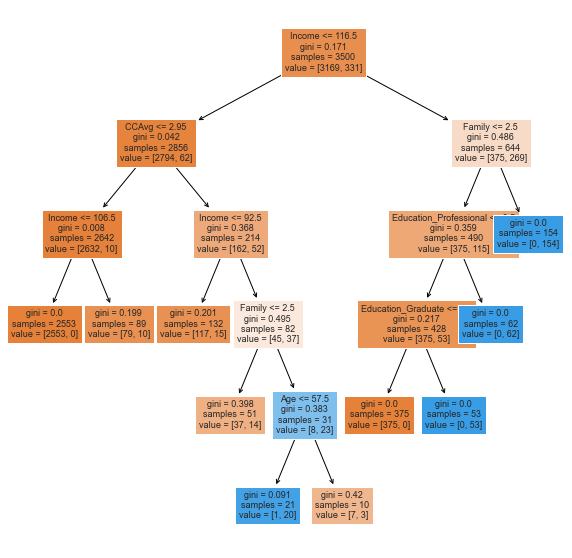

In [97]:
plt.figure(figsize=(10,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [98]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_Professional <= 0.50
|   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_Professional >  0.50
|   |   |   |--- weights: [0.00, 6

In [99]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Income                  0.306430
Family                  0.258143
Education_Graduate      0.168695
Education_Professional  0.147127
CCAvg                   0.045718
CD_Account              0.021361
Age                     0.019531
Experience              0.018229
ZIPCode_94              0.006488
Mortgage                0.003236
Online                  0.002224
ZIPCode_92              0.002224
ZIPCode_93              0.000594
Securities_Account      0.000000
ZIPCode_91              0.000000
ZIPCode_95              0.000000
ZIPCode_96              0.000000
CreditCard              0.000000


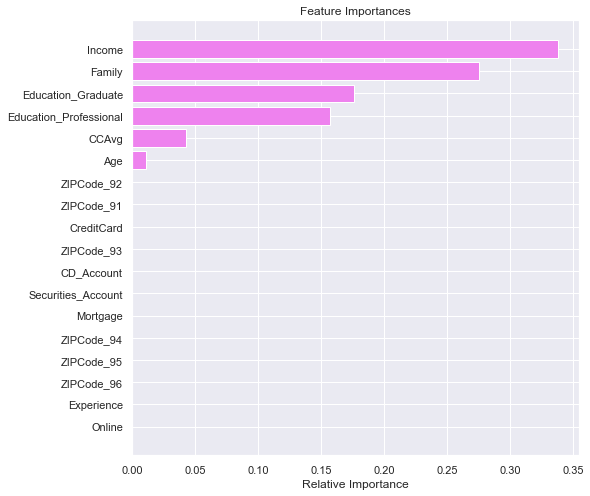

In [100]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Decision tree after pre-pruning has given similar performance, feature importance and decision rules.

## Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfitting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

In [101]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [102]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000381,0.006182


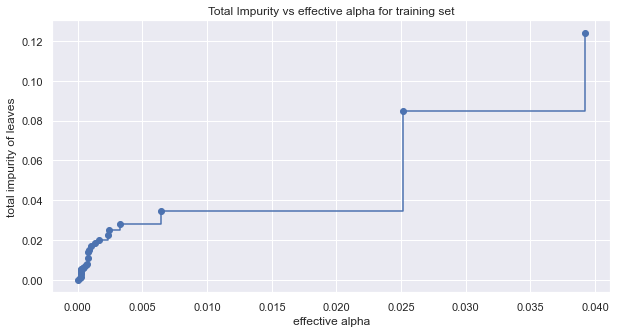

In [103]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [104]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

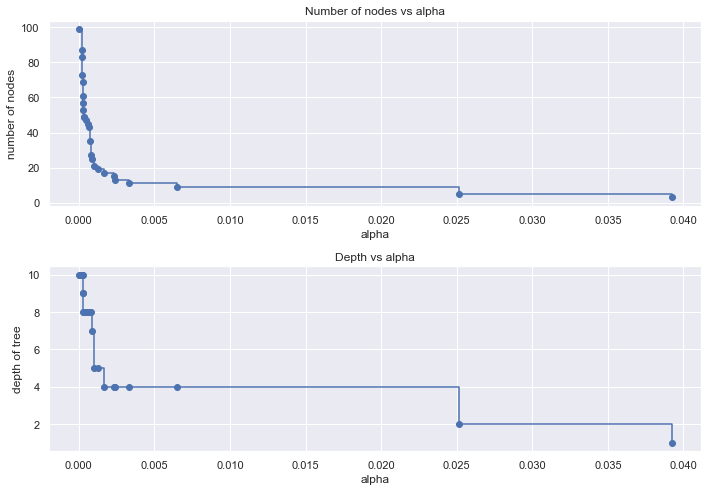

In [105]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training Recall and 91% testing Recall. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [106]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)
    
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

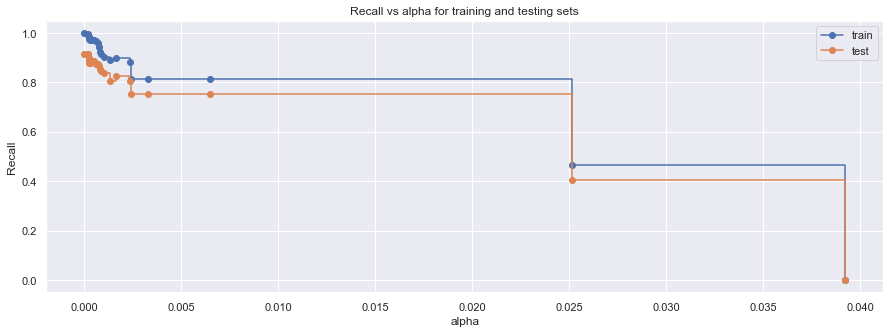

In [107]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [108]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


* Post-pruning using ccp alpha returns the same model as the initial model(Tree with no pruning).
* As post pruning model is the same as the initial decision tree mode, the performance and feature importance will also be the same.

### Comparing Model Performance 

In [109]:
# defining list of model
models = [lg5]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:
    
    j = get_metrics_score(model,'stats',X_train5,X_test5,y_train,y_test,flag=False)
    k = get_metrics_score(model,'stats',X_train5,X_test5,y_train,y_test,threshold=optimal_threshold_auc_roc,flag=False)
    l = get_metrics_score(model,'stats',X_train5,X_test5,y_train,y_test,threshold=optimal_threshold_curve,flag=False)
    
    # intial logistic regression model
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
    # logistic regression with threshold = 0.77
    acc_train.append(k[0])
    acc_test.append(k[1])
    recall_train.append(k[2])
    recall_test.append(k[3])
    precision_train.append(k[4])
    precision_test.append(k[5])
    f1_train.append(k[6])
    f1_test.append(k[7])
    
    # logistic regression with threshold = 0.58
    acc_train.append(l[0])
    acc_test.append(l[1])
    recall_train.append(l[2])
    recall_test.append(l[3])
    precision_train.append(l[4])
    precision_test.append(l[5])
    f1_train.append(l[6])
    f1_test.append(l[7])

In [110]:
# defining list of model
models = [dTree,estimator,best_model]


# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,'sklearn',X_train,X_test,y_train,y_test,flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [111]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression-0.07','Logistic Regression-0.25',
                                          'Decision Tree','Decision Tree(pre-pruned)','Decision Tree(post-pruned)'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 


comparison_frame


,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.958857,0.958667,0.676737,0.657718,0.858238,0.899083
1,Logistic Regression-0.07,0.885714,0.892667,0.915408,0.899329,0.448889,0.478571
2,Logistic Regression-0.25,0.949714,0.950000,0.815710,0.758389,0.701299,0.743421
3,Decision Tree,1.000000,0.986667,1.000000,0.912752,1.000000,0.951049
4,Decision Tree(pre-pruned),0.987714,0.978667,0.873112,0.785235,0.996552,1.000000
5,Decision Tree(post-pruned),1.000000,0.986667,1.000000,0.912752,1.000000,0.951049


### Conclusion
* Overall we can see that the Decision tree performs better on a given dataset
* Looking at important variables based on p-values in Logistic regression and Feature importance in Decision trees
    * Income, CCAvg, CD_Account, Family, Education are important in Both
    * From the Logistic Regression model we observe that the above-mentioned attributes have a positive relationship with Personal Loan.

### Business Recommendations

* We have been able to build a predictive model:

  a) that the bank can deploy to identify customers who will be interested in taking a personal loan.

  b) that the bank can use to find the key factors that will have an impact on a customer taking a personal loan or not.

* Factors that have an impact on Personal_Loan: Income, Family, Education. 

* Higher income customers should be the target customers for the bank - Customers who have income above 116k dollars and a family of more than 2, such customers have higher chances of taking personal loans.

* Higher education higher are the chances to take a loan - Customers who are more educated (education level greater than undergraduate) have a higher chance of taking a personal loan.

* Size of the family has a positive correlation with the personal loan, as the size of the family increases (generally a family size of 3 or more than 3 members) have more chances of a customer taking a personal loan.

* Our analysis showed that ~50% of the customers who have the certificate of deposit with the bank (CD_Account) are the ones that have the requirement of Personal Loan - Bank should target such customers.

### Misclassification analysis
* To check whether there is any certain pattern followed by samples that are incorrectly classified by our model (dTree).

In [112]:
data["ZIPCode"] = data["ZIPCode"].astype('category')

X = data.drop(['Personal_Loan'], axis=1)
Y = data[['Personal_Loan']] 

X = pd.get_dummies(X, columns=['ZIPCode','Education'],drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
Y1 = dTree.predict(X_test) 
Y1 = Y1.reshape(1500, 1)

Y2 = np.subtract(y_test.astype('int') ,Y1)

# 1 says, Perosn would buy loan but model predicted he won't
# -1 says, Perosn won't buy loan but model predicted he would

#Let's concatenate this Y2 with X
data1 = pd.DataFrame(Y2)
data2 = pd.concat([X_test, data1], axis=1)

In [113]:
incorrect_data = data2[data2['Personal_Loan'] != 0] 

In [114]:
incorrect_data.shape

(20, 19)

* There are 20 misclassifications and on the test set.
* incorrect_data consists of all misclassified elements

In [115]:
#Since Zipcode was not an important variable in both Logistic Regression and Decision trees. let's drop that - to make 
# visualization easier

incorrect_data = incorrect_data.drop(['ZIPCode_91','ZIPCode_92','ZIPCode_93','ZIPCode_94','ZIPCode_95','ZIPCode_96'], axis = 1)

incorrect_data

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Professional,Personal_Loan
349,26,2,60,2,3.0,132,0,0,0,0,0,0,1
927,65,40,95,3,3.7,138,0,0,0,1,1,0,1
1518,43,17,64,4,3.0,221,0,0,1,0,0,1,1
12,48,23,114,2,3.8,0,1,0,0,0,0,1,-1
322,63,39,101,1,3.9,0,1,1,1,0,0,0,1
1577,34,8,65,1,3.0,227,0,0,1,0,0,0,1
2544,58,34,90,1,3.6,0,0,0,0,0,1,0,1
2533,54,29,111,1,1.1,0,0,0,1,0,1,0,1
4575,53,27,115,2,0.5,0,0,0,0,0,0,1,1
4229,54,24,83,1,3.0,0,0,0,0,0,0,1,-1


* Let's try to see if there is any specific pattern in these samples

In [116]:
profile  = ProfileReport(incorrect_data,title = 'Misclassified Data Points',minimal=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Looking at the above profile, we see that incorrectly classified people are :
* Usually between 26 and 65 age and have experience in between 2 to 40 years, with 15 and 17 uniques values.
* Income varies between 60 to 115(thousand dollars), while usual income varied from 8 to 224(thousand dollars)
* Most of the people misclassified have 0 mortgages, no Securities Account, and no CD_account, have a family size 1 or 2, and customers who do not prefer internet banking facilities.
* Based on the business rule, we derived we were able to see that usually people with income less than 116, less mortgage, family size less than 3 doesn't buy loan - There are special cases always, so some people with less income and smaller family size might also buy loan.